# Heat Maps

Using the `seaborn` module in Python

In [9]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### The Basics

A <b>heat map</b> uses colors on a grid to show intensity of different values. We can call the `heatmap` method from the seaborn module and pass in a 2D array of numbers:
* Documentation:  https://seaborn.pydata.org/generated/seaborn.heatmap.html

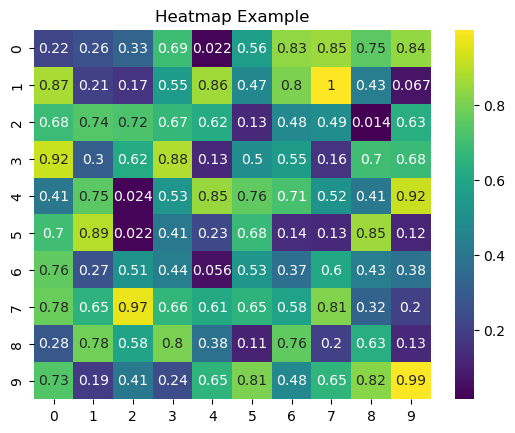

In [12]:
# Create a 10x10 matrix of random numbers
data = np.random.rand(10, 10)

# Create a heatmap using seaborn
sns.heatmap(data, annot=True, cmap='viridis')

# Add title to the heatmap
plt.title('Heatmap Example')

# Display the heatmap
plt.show()

The `cmap` attribute defines the color scale. The scale can be continuous or discrete, sequential or diverging. Seaborn has a number of built-in colormaps that we can use. 
* Documentation:  https://seaborn.pydata.org/tutorial/color_palettes.html
* See also https://matplotlib.org/stable/users/explain/colors/colormaps.html

Here are a few other examples:

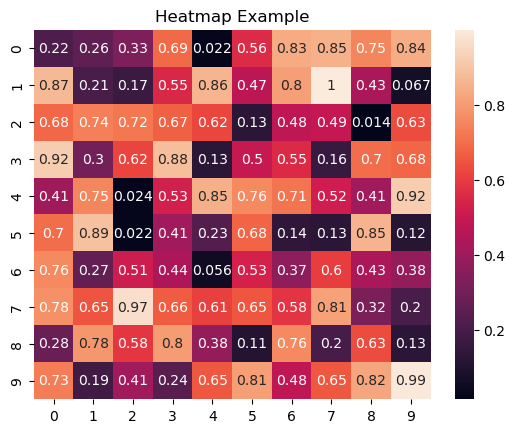

In [13]:
# Create a heatmap using seaborn
sns.heatmap(data, annot=True, cmap='rocket')

# Add title to the heatmap
plt.title('Heatmap Example')

# Display the heatmap
plt.show()

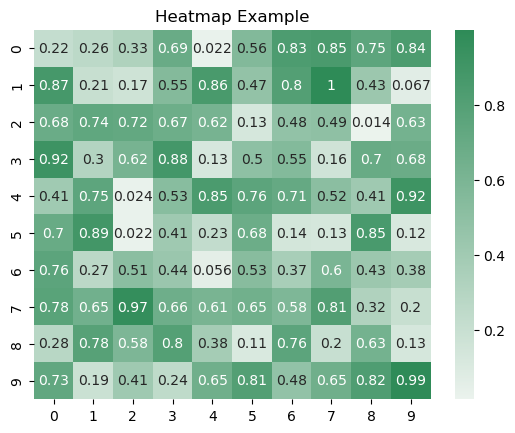

In [15]:
# Create a heatmap using seaborn
sns.heatmap(data, annot=True, cmap=sns.light_palette("seagreen", as_cmap=True))

# Add title to the heatmap
plt.title('Heatmap Example')

# Display the heatmap
plt.show()

Additional useful parameters include:
* `annot` -- set to `True` to include the data values in each square
* `vmin` and `vmax` -- set low and high values for sequential data
* `center` -- set the midpoint value for a diverging scale
* `linewidths` -- width of the lines that divide each cell
* `linecolor` -- color of the lines that divide each cell
* `cbar` -- whether to draw the colorbar

### Tutorial:  Plotting Correlation Coefficients

Suppose we want to visualize how certain pairs of companies on the stock market are correlated with each other:  do their stock prices rise and fall together (positively correlated), does one company do better when the other does worse (negatively correlated), or is there no relationship (no correlation)?

We can gather some stock price information from Yahoo finance:

In [17]:
import yfinance as yf

stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
stock_df = pd.DataFrame()
for s in stocks:
    stock_df[s] = pd.DataFrame(yf.download(s,start='2014-01-01',end='2014-12-31', progress = False))['Close']
stock_df.head()

,ORCL,TSLA,IBM,YELP,MSFT
Date,,,,,
2014-01-02,37.840000,10.006667,177.370941,67.919998,37.160000
2014-01-03,37.619999,9.970667,178.432129,67.660004,36.910000
2014-01-06,37.470001,9.800000,177.820267,71.720001,36.130001
2014-01-07,37.849998,9.957333,181.367111,72.660004,36.410000
2014-01-08,37.720001,10.085333,179.703629,78.419998,35.759998


<Axes: xlabel='Date'>

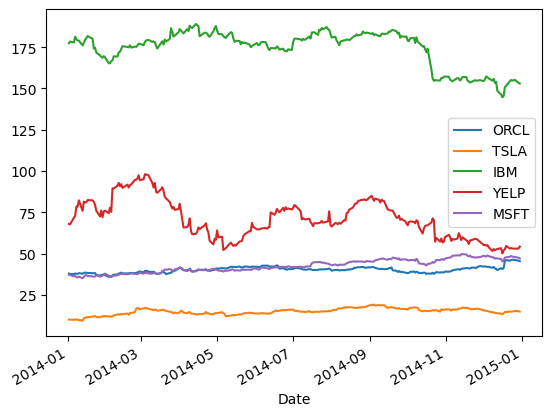

In [19]:
stock_df.plot()

Next, we will calculate returns over a period of length $T,$ defined as:

$$ r(t) = \frac{f(t)-f(t-T)}{f(t)} $$

The returns can be computed with a simple DataFrame method **`pct_change()`**.  Note that for the first $T$ timesteps, this value is not defined (of course):

In [21]:
rets = stock_df.pct_change(30)
rets.iloc[25:35]

,ORCL,TSLA,IBM,YELP,MSFT
Date,,,,,
2014-02-07,NaN,NaN,NaN,NaN,NaN
2014-02-10,NaN,NaN,NaN,NaN,NaN
2014-02-11,NaN,NaN,NaN,NaN,NaN
2014-02-12,NaN,NaN,NaN,NaN,NaN
2014-02-13,NaN,NaN,NaN,NaN,NaN
2014-02-14,0.003700,0.320653,-0.009918,0.321849,0.012379
2014-02-18,0.009304,0.361995,-0.018485,0.355897,0.013817
2014-02-19,0.010675,0.317279,-0.016398,0.254880,0.038195
2014-02-20,0.011096,0.405798,-0.028728,0.257501,0.036803


Now we'll plot the timeseries of the returns of the different stocks.

Notice that the `NaN` values are gracefully dropped by the plotting function.

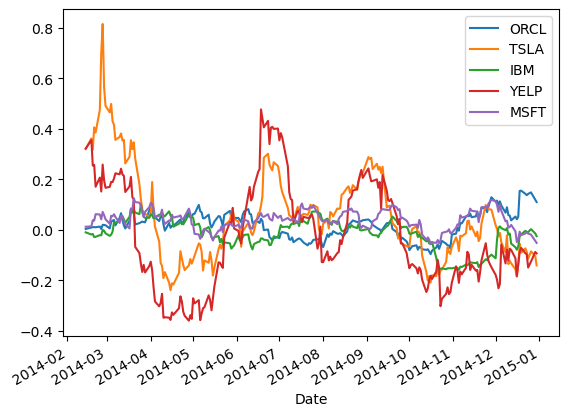

In [22]:
rets.plot();

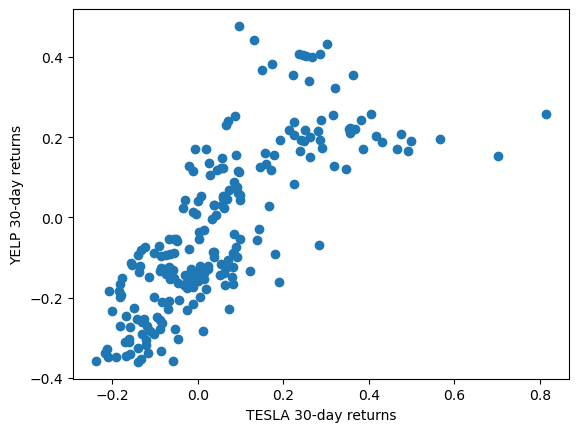

In [23]:
plt.scatter(rets.TSLA, rets.YELP)
plt.xlabel('TESLA 30-day returns')
plt.ylabel('YELP 30-day returns');

There appears to be some (fairly strong) correlation between the movement of TSLA and YELP stocks.  Let's measure this.

The correlation coefficient between variables $X$ and $Y$ is defined as follows:

$$ \text{Corr}(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X\sigma_Y} $$

Pandas provides a dataframe method to compute the correlation coefficient of all pairs of columns: **`corr()`**.

In [24]:
rets.corr()

,ORCL,TSLA,IBM,YELP,MSFT
ORCL,1.000000,0.007218,0.026666,-0.083688,0.131830
TSLA,0.007218,1.000000,0.196371,0.769623,0.411348
IBM,0.026666,0.196371,1.000000,0.104705,0.343697
YELP,-0.083688,0.769623,0.104705,1.000000,0.264703
MSFT,0.131830,0.411348,0.343697,0.264703,1.000000


It takes a bit of time to examine that table and draw conclusions.  

To speed that process up it helps to visualize the table.

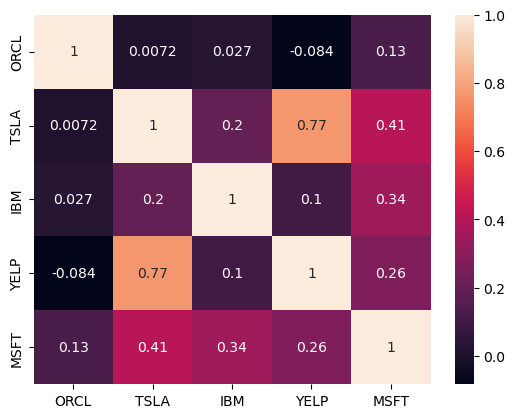

In [25]:
sns.heatmap(rets.corr(), annot=True);

Notice that seaborn automatically takes row and column labels from the pandas dataframe and incorporates them into the heatmap.

It might be helpful to employ a diverging color palette to show the difference between positive and negative correlations:
* Postive correlations will appear in red (darker = higher value)
* Negative correlations will appear in blue (darker = lower value)
* Pairs that are not correlated will appear in lighter shades of red or blue

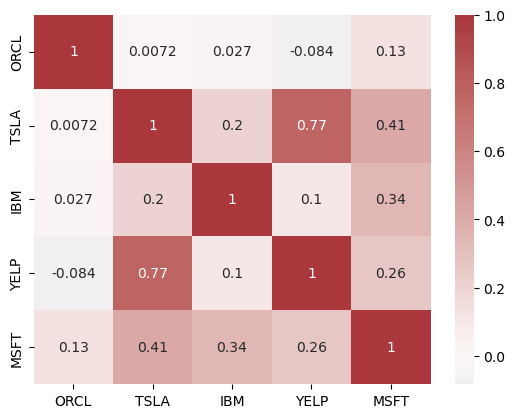

In [26]:
sns.heatmap(rets.corr(), annot=True, cmap="vlag", center = 0);

Now we can see the higher correlation between YELP and TSLA standing out from the rest. 

### Tutorial:  Plotting US Presidential Election Data

Let's choose a few states and plot their recent presidential election history

Data source:  https://www.presidency.ucsb.edu/statistics/elections


In [2]:
years = list(range(2000, 2021, 4))
data_frames = []
for y in years:
    cur_pd = pd.read_excel(f"{y}_election.xlsx")
    cur_pd.set_index('STATE', inplace=True)
    data_frames.append(cur_pd)



In [3]:
data_frames[0].head()

,TOTAL VOTES,Votes (R),%,EV,Votes (D),%.1,EV.1,Votes (Other),%.2,EV.2
STATE,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,1666272.0,941173.0,56.5,9.0,692611.0,41.6,NaN,18323,1.1,NaN
Alaska,285560.0,167398.0,58.6,3.0,79004.0,27.7,NaN,28747,10.1,NaN
Arizona,1532016.0,781652.0,51.0,8.0,685341.0,44.7,NaN,45645,3.0,NaN
Arkansas,921781.0,472940.0,51.3,6.0,422768.0,45.9,NaN,13421,1.5,NaN


In [4]:
# Utah and her neighbors
states = ["Utah", "Idaho", "Wyoming", "Colorado", "New Mexico", "Arizona", "Nevada"]
states.sort()

# values of interest
columns = ["TOTAL VOTES", "Votes (D)", "Votes (R)"]

reduced_frames = []

for i in range(len(data_frames)):
    new_df = data_frames[i].loc[states, columns]
    reduced_frames.append(new_df)
    print(new_df)

            TOTAL VOTES  Votes (D)  Votes (R)
STATE                                        
Arizona       1532016.0   685341.0   781652.0
Colorado      1741368.0   738227.0   883748.0
Idaho          501621.0   138637.0   336937.0
Nevada         608970.0   279978.0   301575.0
New Mexico     598605.0   286783.0   286417.0
Utah           770754.0   203053.0   515096.0
Wyoming        218351.0    60481.0   147947.0
            TOTAL VOTES  Votes (D)  Votes (R)
STATE                                        
Arizona       2012585.0   893524.0  1104294.0
Colorado      2130330.0  1001732.0  1101255.0
Idaho          598447.0   181098.0   409235.0
Nevada         829587.0   397190.0   418690.0
New Mexico     756304.0   370942.0   376930.0
Utah           927844.0   241199.0   663742.0
Wyoming        243428.0    70776.0   167629.0
            TOTAL VOTES  Votes (D)  Votes (R)
STATE                                        
Arizona       2293475.0  1034707.0  1230111.0
Colorado      2401361.0  1288576.0

To create a heatmap, we will need a single table that contains percentages of total votes for one party or the other
* For simplicity, we are ignoring 3rd-party candidates 

Let's calculate total votes based on the sum of Votes (D) and Votes (R), and convert to a percent by dividing Votes (R) against the total:

In [5]:
table = [[0 for i in years] for j in states]

for i in range(len(reduced_frames)):
    year = years[i]
    # print(year)
    for j in range(len(states)):
        
        state = states[j]
        
        cur_row = reduced_frames[i].loc[[state], :]
        d_votes = cur_row["Votes (D)"].iloc[0]
        r_votes = cur_row["Votes (R)"].iloc[0]        
        # total_votes = cur_row["TOTAL VOTES"].iloc[0]
        total_votes = d_votes + r_votes 
        table[j][i] = round(r_votes / total_votes * 100, 2)
        
        
        # print(state, d_votes / total_votes, r_votes / total_votes)
    # print()

        
        # print(cur_row["Votes (D)"] / cur_row["TOTAL VOTES"])
        
heatmap_df = pd.DataFrame(table, columns=years, index=states)


Now on to the heat map:
* We will use the "coolwarm" diverging color scale (blues are low, reds are high)
* We will set the center value of the diverging scale to be 50
* `annot = True` puts the data values in the boxes 

<Axes: >

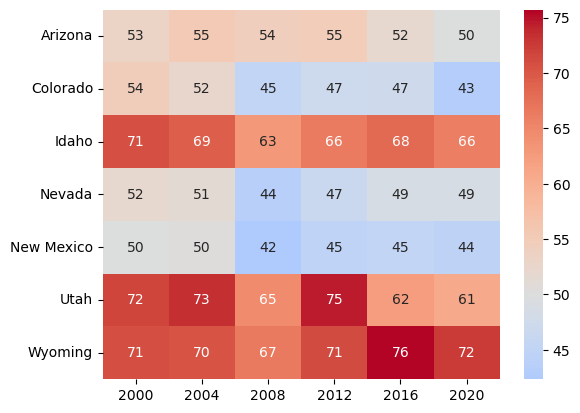

In [7]:
sns.heatmap(heatmap_df, center=50, cmap="coolwarm", annot=True)

Plotting results just out of the total votes between the two major political parties hides some interesting parts of the story. For example, the true result for Utah in 2016 was under 50%.

We can redo the plot based on the actual total votes:
* Note that this is also a little misleading, since the Republican candidate still won the plurality of Utah's vote in 2016

<Axes: >

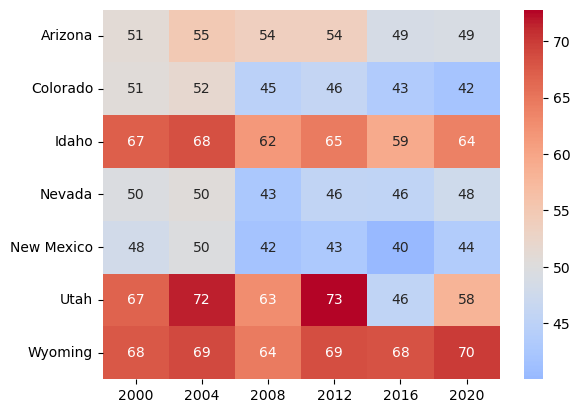

In [8]:
table = [[0 for i in years] for j in states]

for i in range(len(reduced_frames)):
    year = years[i]
    # print(year)
    for j in range(len(states)):
        
        state = states[j]
        
        cur_row = reduced_frames[i].loc[[state], :]
        d_votes = cur_row["Votes (D)"].iloc[0]
        r_votes = cur_row["Votes (R)"].iloc[0]        
        total_votes = cur_row["TOTAL VOTES"].iloc[0]
        # total_votes = d_votes + r_votes 
        table[j][i] = round(r_votes / total_votes * 100, 2)
        
        
        # print(state, d_votes / total_votes, r_votes / total_votes)
    # print()

        
        # print(cur_row["Votes (D)"] / cur_row["TOTAL VOTES"])
        
heatmap_df = pd.DataFrame(table, columns=years, index=states)

sns.heatmap(heatmap_df, center=50, cmap="coolwarm", annot=True)


The color scale in this case is also potentially misleading, since Utah's 2016 electoral votes did not go to the Democratic candidate. Another way we could visualize this data is by using two heatmaps side-by-side with sequential color scales:
* Let's make a blue sequential heatmap for percentage of democratic votes
* Let's make a red sequential heatmap for percentage of republican votes

In [29]:
red_table = [[0 for i in years] for j in states]
blue_table = [[0 for i in years] for j in states]

for i in range(len(reduced_frames)):
    year = years[i]
    # print(year)
    for j in range(len(states)):
        
        state = states[j]
        
        cur_row = reduced_frames[i].loc[[state], :]
        d_votes = cur_row["Votes (D)"].iloc[0]
        r_votes = cur_row["Votes (R)"].iloc[0]        
        total_votes = cur_row["TOTAL VOTES"].iloc[0]

        red_table[j][i] = round(r_votes / total_votes * 100, 2)
        blue_table[j][i] = round(d_votes / total_votes * 100, 2)

        
red_heatmap_df = pd.DataFrame(red_table, columns=years, index=states)
blue_heatmap_df = pd.DataFrame(blue_table, columns=years, index=states)


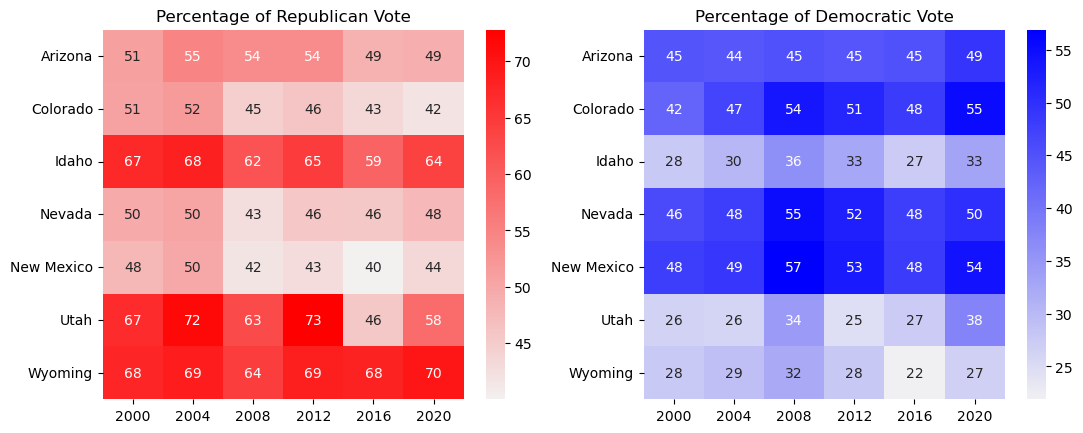

In [36]:
fig = plt.figure(figsize=(12.8, 4.8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122) 

sns.heatmap(red_heatmap_df, annot=True, ax=ax1, cmap=sns.light_palette("red", as_cmap=True))
sns.heatmap(blue_heatmap_df, annot=True, ax=ax2, cmap=sns.light_palette("blue", as_cmap=True))

ax1.set_title("Percentage of Republican Vote")
ax2.set_title("Percentage of Democratic Vote")

plt.show()

We can fix the scales so that the same color intensity represent the same values across graphs:

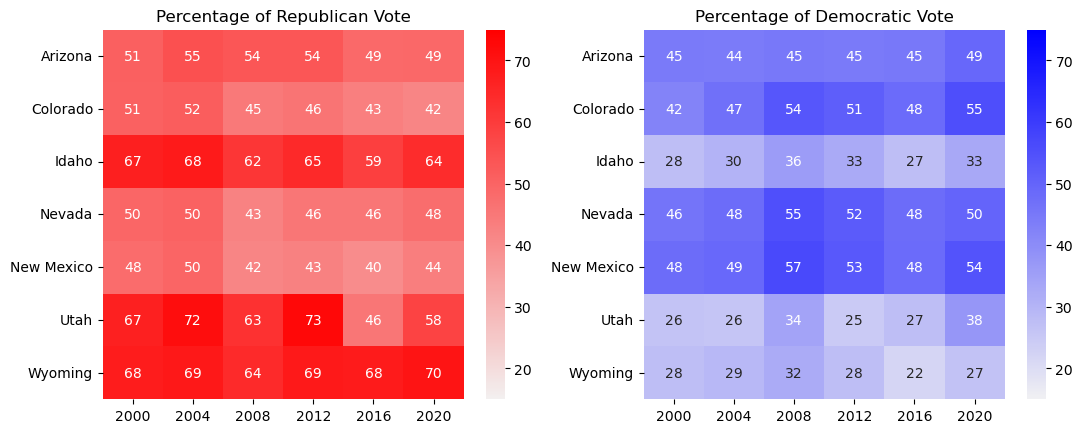

In [37]:
fig = plt.figure(figsize=(12.8, 4.8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122) 

sns.heatmap(red_heatmap_df, annot=True, ax=ax1, cmap=sns.light_palette("red", as_cmap=True), vmin = 15, vmax = 75)
sns.heatmap(blue_heatmap_df, annot=True, ax=ax2, cmap=sns.light_palette("blue", as_cmap=True), vmin = 15, vmax = 75)

ax1.set_title("Percentage of Republican Vote")
ax2.set_title("Percentage of Democratic Vote")

plt.show()

Finally, we can use a discrete red / blue color scale to just visualize the electoral votes for each state:

<Axes: >

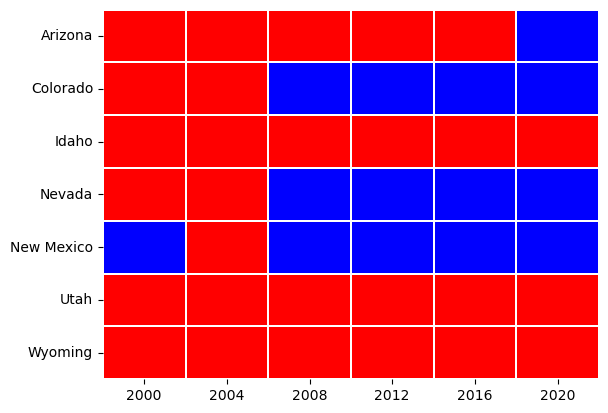

In [42]:
table = [[0 for i in years] for j in states]

for i in range(len(reduced_frames)):
    year = years[i]
    for j in range(len(states)):
        
        state = states[j]
        
        cur_row = reduced_frames[i].loc[[state], :]
        d_votes = cur_row["Votes (D)"].iloc[0]
        r_votes = cur_row["Votes (R)"].iloc[0]        
        total_votes = cur_row["TOTAL VOTES"].iloc[0]
        table[j][i] = 1 if r_votes > d_votes else 0
        
                
heatmap_df = pd.DataFrame(table, columns=years, index=states)

sns.heatmap(heatmap_df, center=0.5, cmap=["blue", "red"], cbar=False, linewidths = 0.1)
